<a href="https://colab.research.google.com/github/HiyaJain22/ML-Lab/blob/main/ANN/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
#divide dataset into independent and dependent
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
#Feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
#concatenate variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)#drop columns

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X,geography,gender],axis=1)


In [12]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
#part 2 create ANN
#Tensorflow-google and pytorch-facebook
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
classifier=Sequential()

In [19]:
#add input layer
classifier.add(Dense(units=11,activation="relu"))

In [40]:
# add first hidden layer
classifier.add(Dense(units=7,activation="relu"))
classifier.add(Dropout(0.2))

In [41]:
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dropout(0.3))

In [22]:
#output layer
classifier.add(Dense(1,activation="sigmoid"))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    # start_from_epoch=0,
)

In [27]:
from keras.callbacks import EarlyStopping
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5035 - accuracy: 0.7960 - val_loss: 0.4601 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4429 - accuracy: 0.7966 - val_loss: 0.4337 - val_accuracy: 0.7967
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4221 - accuracy: 0.8084 - val_loss: 0.4197 - val_accuracy: 0.8111
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4064 - accuracy: 0.8205 - val_loss: 0.4087 - val_accuracy: 0.8201
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3940 - accuracy: 0.8334 - val_loss: 0.3980 - val_accuracy: 0.8285
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3818 - accuracy: 0.8425 - val_loss: 0.3891 - val_accuracy: 0.8323
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8449 - val_loss: 0.3845 - val_accuracy:

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

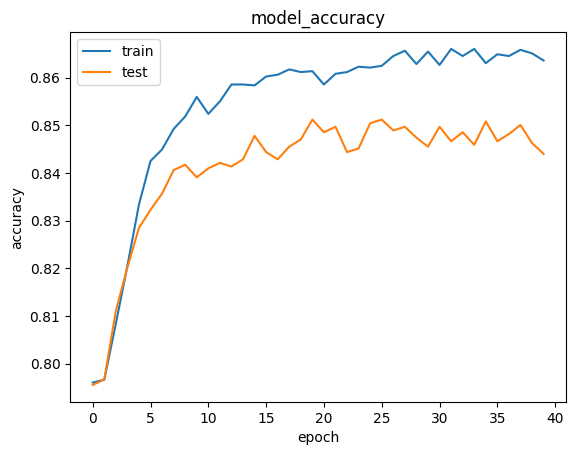

In [30]:
#summary
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

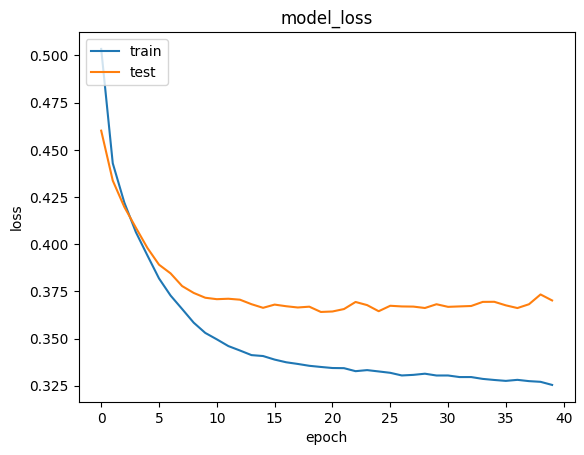

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [33]:
#prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[1521,   74],
       [ 208,  197]])

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [38]:
score

0.859

In [39]:
##getting weights
classifier.get_weights()

[array([[ 0.13688   , -0.15877189,  0.10180369,  0.3792604 , -0.05125859,
         -0.24895167, -0.25228032, -0.05448115,  0.6361785 ,  0.23632678,
         -0.28904963],
        [-0.6749281 , -0.34661227, -0.29239312,  0.09207023,  0.10498449,
         -0.38345802,  0.5610272 ,  0.1464757 , -0.6718576 ,  0.47861272,
          0.440889  ],
        [-0.16679014,  0.098779  ,  0.12371861,  0.09550437, -0.08177786,
         -0.07466619,  0.06893024, -0.07006359,  0.21969   ,  0.01122035,
          0.05340242],
        [ 0.0733022 , -0.6772798 , -0.12655652, -0.5256289 ,  0.39294454,
          0.01346388, -0.01718653, -0.2268288 ,  0.1982514 , -0.2084918 ,
          0.49482757],
        [-0.04026551, -0.09884693,  0.003167  ,  0.8849173 ,  0.8798369 ,
          0.17569661,  0.8776533 , -1.2563803 , -0.15851271, -0.1935606 ,
          0.44788522],
        [-0.03520677, -0.14082457, -0.10393934, -0.39503863,  0.03532882,
          0.0730564 ,  0.12673794,  0.02560249,  0.42654982,  0.3697179